In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

#print(url)

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | tessalit
Processing Record 10 of Set 1 | inirida
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | ixtapa
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | scarborough
Processing Record 21 of Set 1 | yuncheng
Processing Record 22 of Set 1 | barawe
City not found. Skipping...
Processing 

Processing Record 35 of Set 4 | monticello
Processing Record 36 of Set 4 | sakakah
Processing Record 37 of Set 4 | fangshan
Processing Record 38 of Set 4 | nuuk
Processing Record 39 of Set 4 | alofi
Processing Record 40 of Set 4 | vostok
Processing Record 41 of Set 4 | rocha
Processing Record 42 of Set 4 | kendari
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | milkovo
Processing Record 45 of Set 4 | manokwari
Processing Record 46 of Set 4 | buala
Processing Record 47 of Set 4 | kununurra
Processing Record 48 of Set 4 | sao joao da barra
Processing Record 49 of Set 4 | valley city
Processing Record 50 of Set 4 | baykit
Processing Record 1 of Set 5 | mangai
Processing Record 2 of Set 5 | naze
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set 5 | itaituba
Processing Record 5 of Set 5 | viedma
Processing Record 6 of Set 5 | auki
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | saint-joseph
Processing Re

Processing Record 20 of Set 8 | calamar
Processing Record 21 of Set 8 | labuan
Processing Record 22 of Set 8 | longyearbyen
Processing Record 23 of Set 8 | kyshtovka
Processing Record 24 of Set 8 | pangnirtung
Processing Record 25 of Set 8 | usagara
Processing Record 26 of Set 8 | fougeres
Processing Record 27 of Set 8 | hualmay
Processing Record 28 of Set 8 | grafton
Processing Record 29 of Set 8 | talnakh
Processing Record 30 of Set 8 | bilibino
Processing Record 31 of Set 8 | nalut
Processing Record 32 of Set 8 | malinovoye ozero
Processing Record 33 of Set 8 | kempsey
Processing Record 34 of Set 8 | airai
Processing Record 35 of Set 8 | tombouctou
Processing Record 36 of Set 8 | doha
Processing Record 37 of Set 8 | mubende
Processing Record 38 of Set 8 | laguna
Processing Record 39 of Set 8 | mahebourg
Processing Record 40 of Set 8 | itarema
Processing Record 41 of Set 8 | raudeberg
Processing Record 42 of Set 8 | jian
Processing Record 43 of Set 8 | lolua
City not found. Skipping.

Processing Record 8 of Set 12 | tuatapere
Processing Record 9 of Set 12 | kaspiyskiy
Processing Record 10 of Set 12 | la libertad
Processing Record 11 of Set 12 | tungor
Processing Record 12 of Set 12 | gold coast
Processing Record 13 of Set 12 | xichang
Processing Record 14 of Set 12 | badarpur
Processing Record 15 of Set 12 | canavieiras
Processing Record 16 of Set 12 | moyobamba
Processing Record 17 of Set 12 | birjand
Processing Record 18 of Set 12 | tocopilla
Processing Record 19 of Set 12 | cardston
Processing Record 20 of Set 12 | kupang
Processing Record 21 of Set 12 | san quintin
Processing Record 22 of Set 12 | lingdong
Processing Record 23 of Set 12 | somerset east
Processing Record 24 of Set 12 | saint anthony
Processing Record 25 of Set 12 | coos bay
Processing Record 26 of Set 12 | edson
Processing Record 27 of Set 12 | owase
Processing Record 28 of Set 12 | rutland
Processing Record 29 of Set 12 | beyneu
Processing Record 30 of Set 12 | evensk
Processing Record 31 of Set

In [9]:
len(city_data)

571

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,274.59,96,100,3.30,RU,2022-05-14 23:06:45
1,Atuona,-9.8000,-139.0333,298.79,78,69,7.10,PF,2022-05-14 23:06:21
2,Rikitea,-23.1203,-134.9692,297.74,71,2,9.21,PF,2022-05-14 23:03:36
3,Avarua,-21.2078,-159.7750,298.18,83,75,1.54,CK,2022-05-14 23:05:07
4,Busselton,-33.6500,115.3333,286.88,74,98,2.66,AU,2022-05-14 23:03:25
5,Victoria,22.2855,114.1577,296.46,93,100,7.60,HK,2022-05-14 23:05:41
6,Sitka,57.0531,-135.3300,282.09,66,75,2.57,US,2022-05-14 23:07:37
7,Ushuaia,-54.8000,-68.3000,276.98,91,36,2.41,AR,2022-05-14 23:03:29
8,Tessalit,20.1986,1.0114,301.95,10,0,3.75,ML,2022-05-14 23:07:38
9,Inirida,3.8653,-67.9239,298.09,92,94,0.63,CO,2022-05-14 23:07:39


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-05-14 23:06:45,64.3833,-173.3000,274.59,96,100,3.30
1,Atuona,PF,2022-05-14 23:06:21,-9.8000,-139.0333,298.79,78,69,7.10
2,Rikitea,PF,2022-05-14 23:03:36,-23.1203,-134.9692,297.74,71,2,9.21
3,Avarua,CK,2022-05-14 23:05:07,-21.2078,-159.7750,298.18,83,75,1.54
4,Busselton,AU,2022-05-14 23:03:25,-33.6500,115.3333,286.88,74,98,2.66
5,Victoria,HK,2022-05-14 23:05:41,22.2855,114.1577,296.46,93,100,7.60
6,Sitka,US,2022-05-14 23:07:37,57.0531,-135.3300,282.09,66,75,2.57
7,Ushuaia,AR,2022-05-14 23:03:29,-54.8000,-68.3000,276.98,91,36,2.41
8,Tessalit,ML,2022-05-14 23:07:38,20.1986,1.0114,301.95,10,0,3.75
9,Inirida,CO,2022-05-14 23:07:39,3.8653,-67.9239,298.09,92,94,0.63


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/14/22'

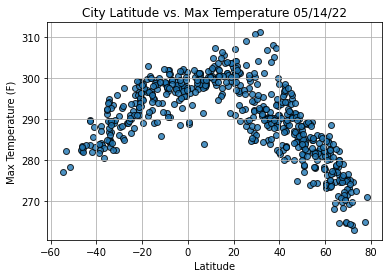

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

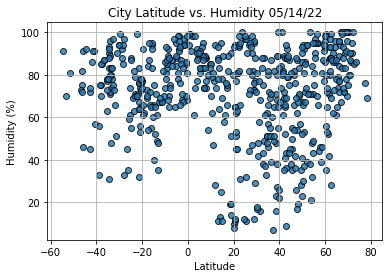

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

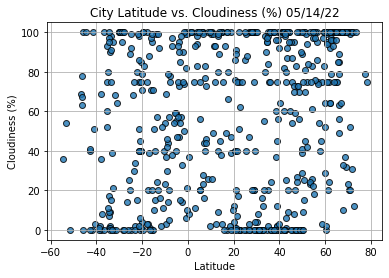

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

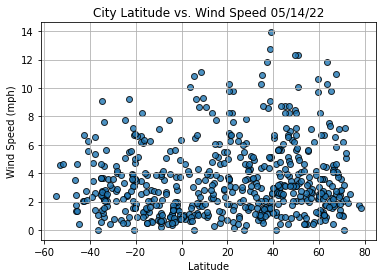

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()